<a href="https://colab.research.google.com/github/sneha30404/Real-Estate-Price-Prediction/blob/main/realestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from csv file

In [ ]:
df=pd.read_csv('Housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Checking if missing values exist in dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Hence, no missing data-values

PAIRPLOT AND DISTPLOT

In [ ]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['price'] = df['price']/10000000
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished':0})
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.3300,7420,4,2,3,1,0,no,no,1,2,yes,1.0
1,1.2250,8960,4,4,4,1,0,no,no,1,3,no,1.0
2,1.2250,9960,3,2,2,1,0,yes,no,0,2,yes,0.5
3,1.2215,7500,4,2,2,1,0,yes,no,1,3,yes,1.0
4,1.1410,7420,4,1,2,1,1,yes,no,1,2,no,1.0


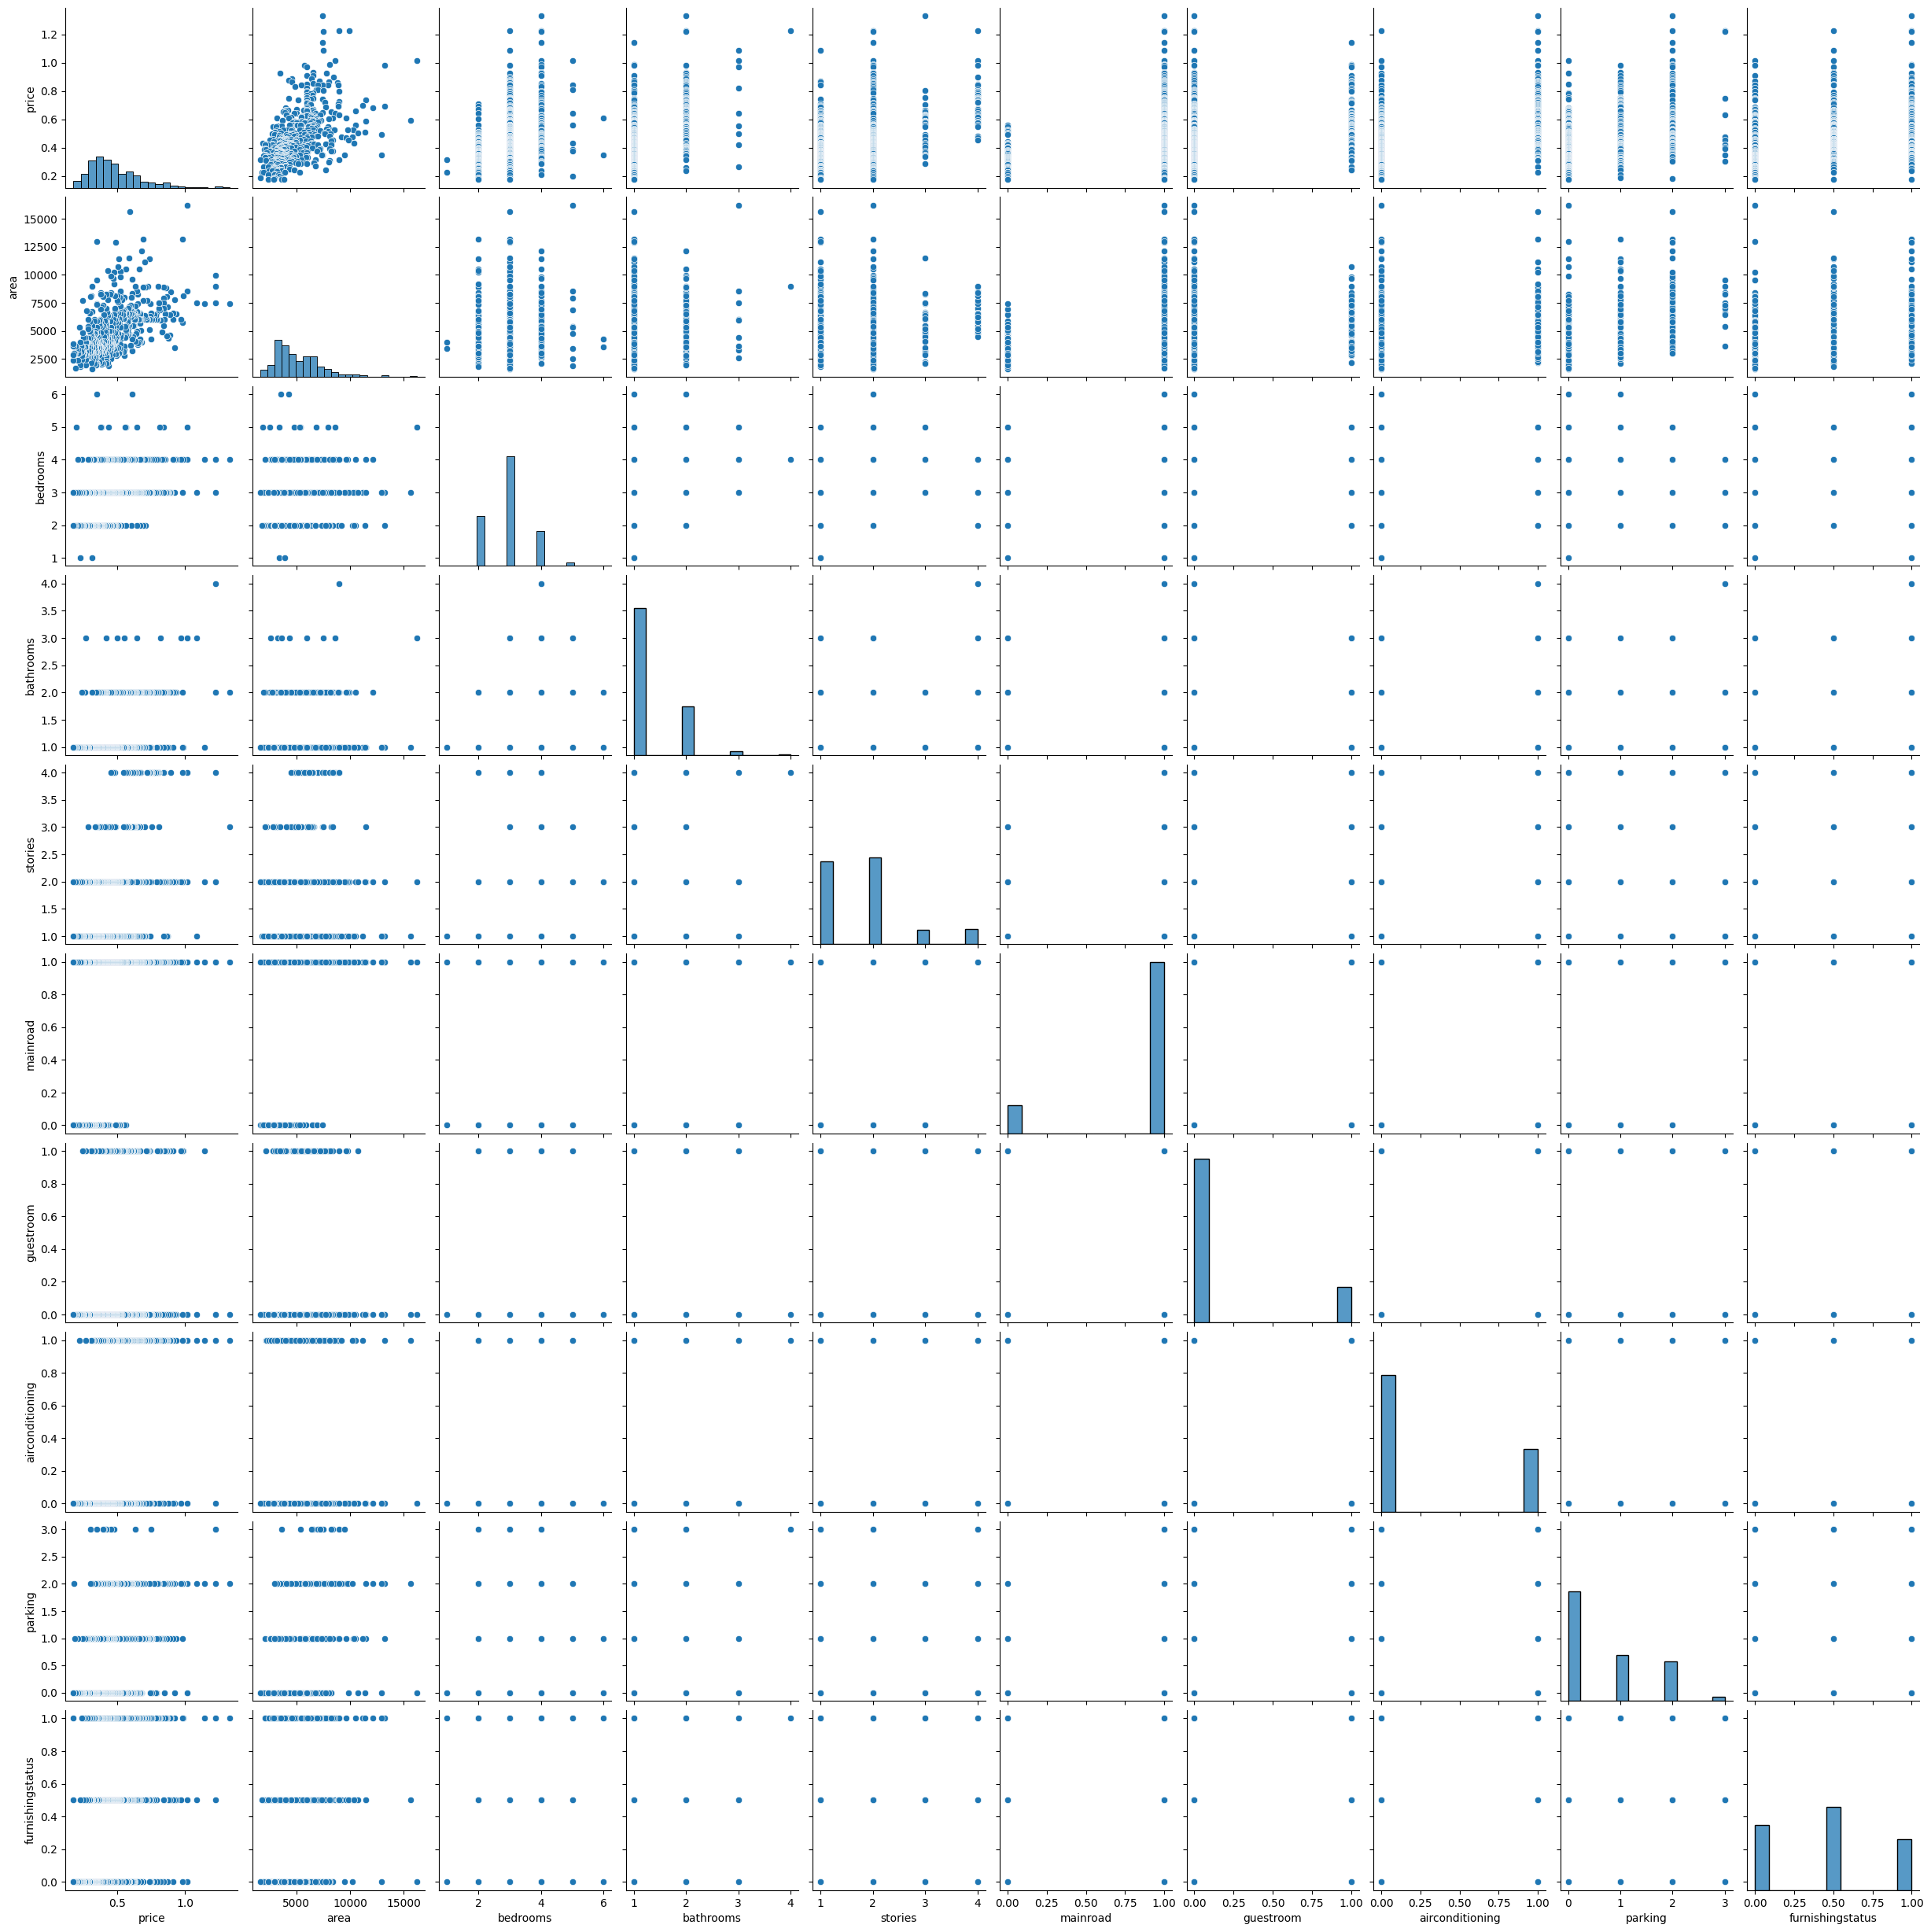

In [ ]:
sns.pairplot(df)
plt.show()

<ipython-input-167-893d9c74734e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='orange')


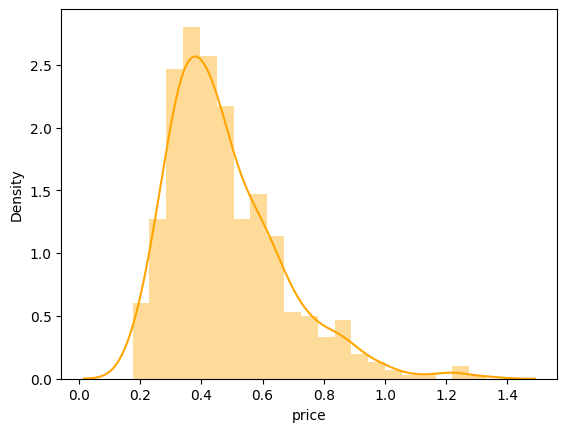

In [ ]:
sns.distplot(df['price'], color='orange')
plt.show()

Identifying features and label

In [ ]:
x=df.drop(['hotwaterheating','basement', 'prefarea','price'],axis=1)
y=df['price']
x.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,1,2,1.0
1,8960,4,4,4,1,0,1,3,1.0
2,9960,3,2,2,1,0,0,2,0.5
3,7500,4,2,2,1,0,1,3,1.0
4,7420,4,1,2,1,1,1,2,1.0
5,7500,3,3,1,1,0,1,2,0.5
6,8580,4,3,4,1,0,1,2,0.5
7,16200,5,3,2,1,0,0,0,0.0
8,8100,4,1,2,1,1,1,2,1.0
9,5750,3,2,4,1,1,1,1,0.0


Split dataset to train and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,furnishingstatus
46,6000,3,2,4,1,0,1,1,1.0
93,7200,3,2,1,1,0,1,3,0.5
335,3816,2,1,1,1,0,1,2,1.0
412,2610,3,1,2,1,0,0,0,0.0
471,3750,3,1,2,1,0,0,0,0.0
237,5010,3,1,2,1,0,0,0,0.5
544,3850,3,1,2,1,0,0,0,0.0
470,5076,3,1,1,0,0,0,0,0.0
511,3180,3,1,1,0,0,0,0,0.0
361,6020,3,1,1,1,0,0,0,0.5


Train the model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(reg.coef_, x.columns, columns=['coefficient'])

,coefficient
area,0.000024
bedrooms,0.014759
bathrooms,0.111065
stories,0.032051
mainroad,0.051280
guestroom,0.050974
airconditioning,0.078375
parking,0.024130
furnishingstatus,0.051487


In [ ]:
reg.intercept_

-0.01392813345870264

In [ ]:
df['price'].value_counts()

,count
price,
0.3500,17
0.4200,17
0.4900,12
0.3150,9
0.5600,9
...,...
0.6580,1
0.4319,1
0.4375,1


Predicting test data

In [ ]:
y_predict = reg.predict(x_test)
pd.DataFrame({'Test':y_test, 'Prediction':y_predict}).head(10)

,Test,Prediction
316,0.4060,0.498820
77,0.6650,0.687704
360,0.3710,0.333889
90,0.6440,0.482399
493,0.2800,0.372447
209,0.4900,0.388020
176,0.5250,0.609877
249,0.4543,0.606322
516,0.2450,0.312531
426,0.3353,0.290553


Evalution of the model

In [ ]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_predict, y_test)
MSE = metrics.mean_squared_error(y_predict, y_test)
RMSE = np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,0.101554
MSE,0.019413
RMSE,0.139331


In [ ]:
df['price'].mean()

0.4766729247706422

Analyzing the residuals in the model

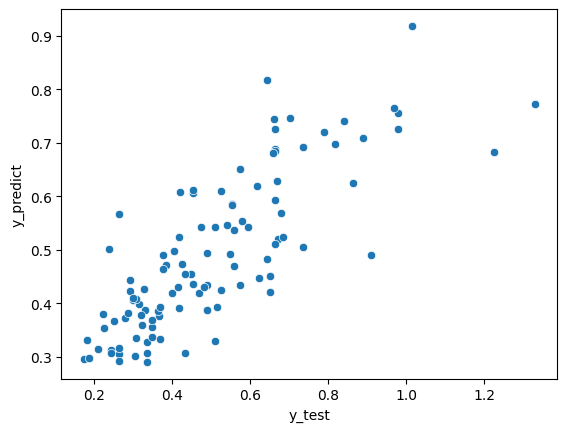

In [ ]:
residuals = y_test-y_predict
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.show()

<ipython-input-178-449001059fb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='price', ylabel='Density'>

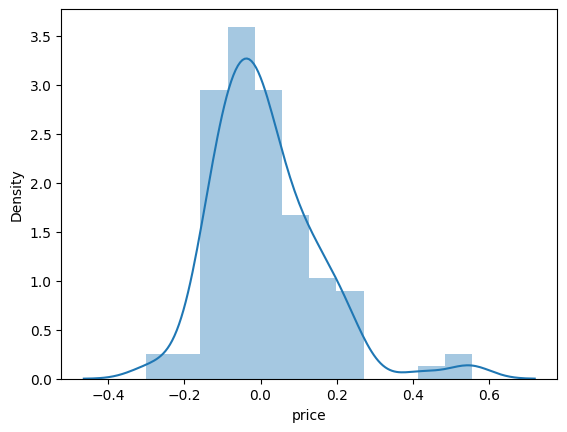

In [ ]:
sns.distplot(residuals)

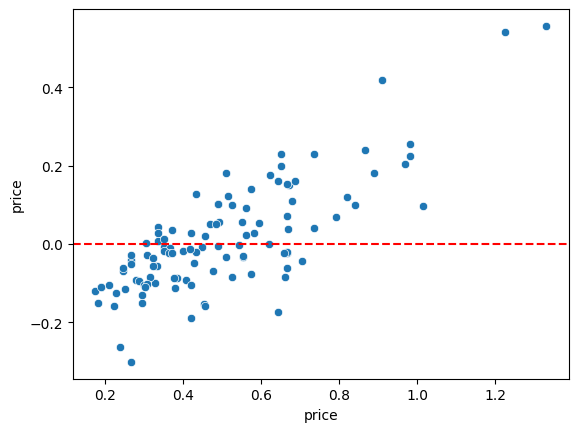

In [ ]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='r', ls='--')

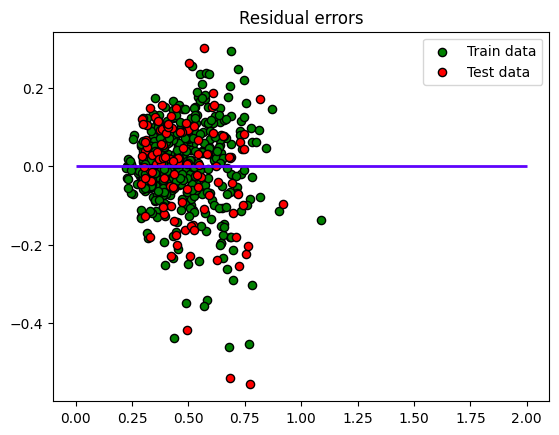

In [ ]:
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train, color = "green", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 2, colors='#5e03fc', linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()